In [5]:
import nltk 
#nltk.download()

In [6]:
from nltk.corpus import names 

print (names.words()[:10])

['Abagael', 'Abagail', 'Abbe', 'Abbey', 'Abbi', 'Abbie', 'Abby', 'Abigael', 'Abigail', 'Abigale']


In [7]:
print( len(names.words()))

7944


In [8]:
from nltk.tokenize import word_tokenize

sent = 'I am reading a book. It is Python Machine Learning By Example, 3rd edition.'

In [9]:
print( word_tokenize(sent))

['I', 'am', 'reading', 'a', 'book', '.', 'It', 'is', 'Python', 'Machine', 'Learning', 'By', 'Example', ',', '3rd', 'edition', '.']


In [10]:
sent2 = 'I have been to U.K. and U.S.A.'
print( word_tokenize(sent2))

['I', 'have', 'been', 'to', 'U.K.', 'and', 'U.S.A', '.']


In [11]:
from nltk.tokenize import sent_tokenize
print ( sent_tokenize(sent))


['I am reading a book.', 'It is Python Machine Learning By Example, 3rd edition.']


In [12]:
import nltk
tokens = word_tokenize(sent)
print (nltk.pos_tag(tokens))

[('I', 'PRP'), ('am', 'VBP'), ('reading', 'VBG'), ('a', 'DT'), ('book', 'NN'), ('.', '.'), ('It', 'PRP'), ('is', 'VBZ'), ('Python', 'NNP'), ('Machine', 'NNP'), ('Learning', 'NNP'), ('By', 'IN'), ('Example', 'NNP'), (',', ','), ('3rd', 'CD'), ('edition', 'NN'), ('.', '.')]


In [13]:
import nltk

# Display information about the 'PRP' and 'VBP' tags
nltk.help.upenn_tagset('PRP')
nltk.help.upenn_tagset('VBP')

PRP: pronoun, personal
    hers herself him himself hisself it itself me myself one oneself ours
    ourselves ownself self she thee theirs them themselves they thou thy us
VBP: verb, present tense, not 3rd person singular
    predominate wrap resort sue twist spill cure lengthen brush terminate
    appear tend stray glisten obtain comprise detest tease attract
    emphasize mold postpone sever return wag ...


In [14]:
import spacy 

#load english model
nlp = spacy.load('en_core_web_sm')

text = 'man suffers more in imagination than in reality - Seneca'
docs = nlp(text)
print([(token.text, token.pos_ ) for token in docs ])

[('man', 'NOUN'), ('suffers', 'VERB'), ('more', 'ADJ'), ('in', 'ADP'), ('imagination', 'NOUN'), ('than', 'ADP'), ('in', 'ADP'), ('reality', 'NOUN'), ('-', 'PUNCT'), ('Seneca', 'NOUN')]


In [15]:
token3 = nlp('The book written by Hayden Liu in 2020 was sold at $30 in America')
print( [(token.text, token.label_) for token in token3.ents])

[('Hayden Liu', 'PERSON'), ('2020', 'DATE'), ('30', 'MONEY'), ('America', 'GPE')]


In [16]:
from nltk.stem.porter import PorterStemmer

porter_stemmer = PorterStemmer()
porter_stemmer.stem('machines')

'machin'

In [17]:
porter_stemmer.stem('learning')

'learn'

In [18]:
from nltk.stem import WordNetLemmatizer
import time 
lemmatizer = WordNetLemmatizer()
lemmatizer.lemmatize('machines')
time.sleep(1)
lemmatizer.lemmatize('learning')


'learning'

In [19]:
lemmatizer.lemmatize('machines')

'machine'

In [20]:
from sklearn.datasets import fetch_20newsgroups

In [21]:
groups = fetch_20newsgroups()


In [22]:
groups.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [23]:
groups['target_names']


['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [24]:
groups.target

array([7, 4, 4, ..., 3, 1, 8])

In [25]:
import numpy as np 
np.unique(groups.target)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

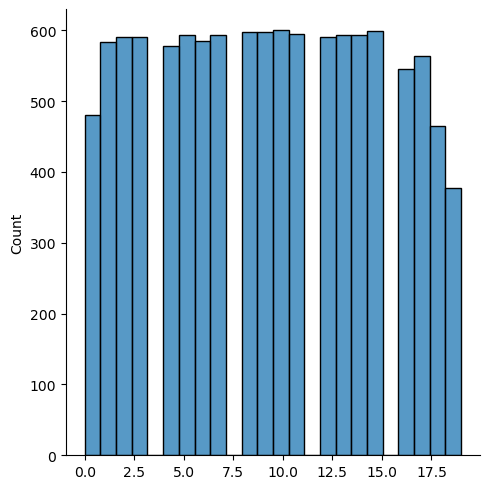

In [26]:
import seaborn as sns 
import matplotlib.pyplot as plt
sns.displot(groups.target)
plt.show()

In [27]:
groups.data[0]

"From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n"

In [28]:
groups.target[0]
groups.target_names[groups.target[0]]

'rec.autos'

In [29]:
groups.target[0]

7

In [30]:
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer(max_features=500)
data_count = count_vector.fit_transform(groups.data)
data_count.shape

(11314, 500)

In [31]:
data_count[1]

<1x500 sparse matrix of type '<class 'numpy.int64'>'
	with 45 stored elements in Compressed Sparse Row format>

In [32]:
data_count.toarray()

array([[0, 0, 0, ..., 0, 2, 1],
       [0, 0, 0, ..., 0, 1, 1],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [33]:
data_count[0].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 1, 0, 0,
        0, 0, 0, 3, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [34]:
print(count_vector.get_feature_names_out())

['00' '000' '10' '100' '11' '12' '13' '14' '145' '15' '16' '17' '18' '19'
 '1993' '20' '21' '22' '23' '24' '25' '26' '27' '30' '32' '34' '40' '50'
 '93' 'a86' 'able' 'about' 'above' 'ac' 'access' 'actually' 'address'
 'after' 'again' 'against' 'ago' 'all' 'already' 'also' 'always' 'am'
 'american' 'an' 'and' 'andrew' 'another' 'answer' 'any' 'anyone'
 'anything' 'apple' 'apr' 'april' 'are' 'armenian' 'around' 'article' 'as'
 'ask' 'at' 'au' 'available' 'away' 'ax' 'b8f' 'back' 'bad' 'based' 'be'
 'because' 'been' 'before' 'being' 'believe' 'best' 'better' 'between'
 'bible' 'big' 'bill' 'bit' 'book' 'both' 'but' 'buy' 'by' 'ca' 'call'
 'called' 'came' 'can' 'canada' 'cannot' 'car' 'card' 'case' 'cc' 'center'
 'change' 'children' 'chip' 'christian' 'clipper' 'co' 'code' 'color'
 'com' 'come' 'computer' 'control' 'could' 'course' 'cs' 'current' 'data'
 'david' 'day' 'days' 'de' 'department' 'did' 'didn' 'different' 'disk'
 'distribution' 'do' 'does' 'doesn' 'doing' 'don' 'done' 'dos' 'do

In [35]:
data_cleaned = []
for _ in groups.data:
    cleaned_text = ' '.join(word for word in _.split() if word.isalpha())
    data_cleaned.append(cleaned_text)

In [36]:
from sklearn.feature_extraction import _stop_words

print(_stop_words.ENGLISH_STOP_WORDS)

frozenset({'seemed', 'could', 'yourself', 'everyone', 'is', 'thin', 'my', 'part', 'itself', 'nevertheless', 'further', 'cannot', 'seeming', 'him', 'whereupon', 'de', 'there', 'it', 'etc', 'again', 'how', 'always', 'mine', 'interest', 'ie', 'please', 'were', 'perhaps', 'why', 'namely', 'co', 'out', 'whole', 'nowhere', 'otherwise', 'seem', 'whereby', 'none', 'about', 'hereupon', 'their', 'nine', 'if', 'we', 'back', 'while', 'what', 'once', 'being', 'up', 'everything', 'has', 'ever', 'cry', 'on', 'beside', 'rather', 'though', 'in', 'herein', 'ltd', 'his', 'within', 'himself', 'should', 'most', 'see', 'me', 'every', 'never', 'amongst', 'the', 'therein', 'such', 'latter', 'hasnt', 'due', 'describe', 'with', 'eleven', 'only', 'anything', 'very', 'bill', 'keep', 'formerly', 'move', 'fire', 'neither', 'four', 'one', 'for', 'anywhere', 'also', 'everywhere', 'often', 'i', 'to', 'alone', 'done', 'by', 'around', 'are', 'couldnt', 'throughout', 'of', 'above', 'former', 'he', 'last', 'not', 'found',

In [37]:
count_vector_sw = CountVectorizer(stop_words='english',max_features= 500 )


In [38]:
from nltk.corpus import names 
all_names= set(names.words())
count_vector_sw = CountVectorizer(stop_words='english',max_features= 500 )

from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
data_cleaned = []
for doc in groups.data:
    doc = doc.lower()
    doc_cleaned = ' '.join(lemmatizer.lemmatize(word) for word in doc.split() if word.isalpha() and word not in all_names)
    data_cleaned.append(doc_cleaned)
    
data_cleaned_count = count_vector_sw.fit_transform(data_cleaned) 

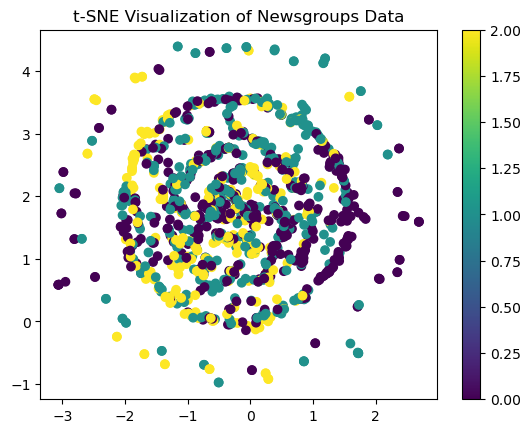

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Define categories
categories_3 = ['talk.religion.misc', 'comp.graphics', 'sci.space']

# Fetch the dataset
groups_3 = fetch_20newsgroups(categories=categories_3, remove=('headers', 'footers', 'quotes'))

# Convert the text data to a TF-IDF matrix
vectorizer = TfidfVectorizer(stop_words='english')
data_cleaned = vectorizer.fit_transform(groups_3.data)

# Apply t-SNE
tsne_model = TSNE(n_components=2, perplexity=40, random_state=42, learning_rate=500)
data_tsne = tsne_model.fit_transform(data_cleaned.toarray())

# Plot the t-SNE results
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=groups_3.target, cmap='viridis')
plt.colorbar()
plt.title("t-SNE Visualization of Newsgroups Data")
plt.show() 

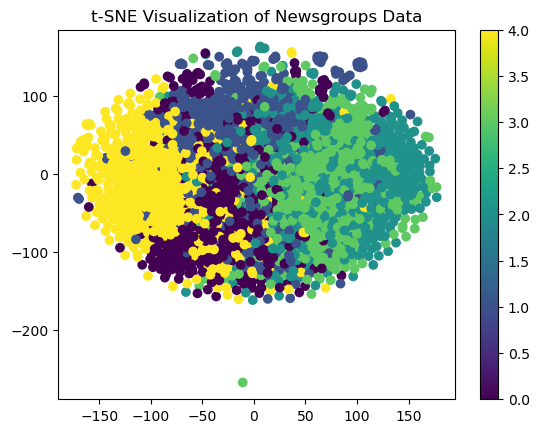

In [40]:
categories_5 = ['comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x']
group_5 = fetch_20newsgroups(categories=categories_5, remove= ('headers', 'footers', 'quotes '))

vectorizer = TfidfVectorizer(stop_words= 'english')

data_cleaned = vectorizer.fit_transform(group_5.data)
tsne_model = TSNE(n_components=2, perplexity=40, random_state=42, learning_rate=500)
data_tsne = tsne_model.fit_transform(data_cleaned.toarray())

# Plot the t-SNE results
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=group_5.target, cmap='viridis')
plt.colorbar()
plt.title("t-SNE Visualization of Newsgroups Data")
plt.show() 


C:\Users\phiri\AppData\Local\Temp\ipykernel_12280\530308378.py:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(centroids_sk[:, 0], centroids_sk[:, 1], s= 200, marker= '*',c='red', cmap='viridis', label ='Centroids')


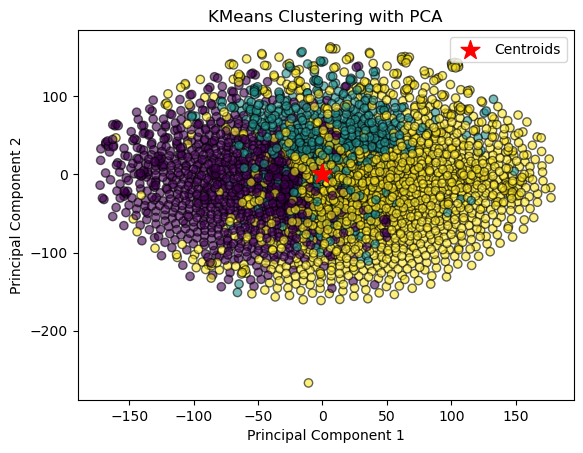

In [45]:
from sklearn.cluster import KMeans

kmeans_sk = KMeans(n_clusters=3, random_state=42)
kmeans_sk.fit(data_cleaned)
clusters_sk = kmeans_sk.labels_
centroids_sk = kmeans_sk.cluster_centers_

#plot the findings 
plt.scatter(data_tsne[:,0], data_tsne[:,1], c=clusters_sk, cmap='viridis', alpha=0.6, edgecolor='k')
plt.scatter(centroids_sk[:, 0], centroids_sk[:, 1], s= 200, marker= '*',c='red', cmap='viridis', label ='Centroids')

plt.title("KMeans Clustering with PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

In [ ]:
from sklearn.datasets import fetch_20newsgroups
catergories =[
    'alt.atheism',
    'talk.religion.misc',
    'comp.graphics',
    'sci.space',
]

groups = fetch_20newsgroups(subset= 'all', categories=catergories, remove=('headers', 'footers', 'quotes'))
labels = groups.target 

labels_names = groups.target_names

def is_letter_only (word):
    for char in word:
        if not char.isalpha():
            return False
        return True
    
from nltk.corpus import names
all_names = set(names.words())

from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

data_cleaned = []

for doc in groups.data: 
    doc = doc.lower()
    doc_cleaned = ' '.join(lemmatizer.lemmatize(word) for word in doc.split() if is_letter_only(word) and word not in all_names)
    data_cleaned.append(doc_cleaned)
    
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer(stop_words='english', max_features=None, max_df= 0.5, min_df= 2)
data = count_vector.fit_transform(data_cleaned)

from sklearn.cluster import KMeans
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(data)
clusters = kmeans.labels_
#centroids = kmeans.cluster_centers_
from collections import Counter 
print(Counter(clusters))

Counter({0: 3382, 1: 3, 2: 1, 3: 1})


In [48]:
from sklearn.decomposition import NMF
t = 20 
nmf = NMF(n_components=t, random_state=42)
data= count_vector.fit_transform(data_cleaned)
nmf.fit(data)
nmf.components_


array([[5.14036714e-02, 0.00000000e+00, 7.38050597e-06, ...,
        0.00000000e+00, 0.00000000e+00, 6.28574852e-04],
       [2.69131602e-05, 0.00000000e+00, 6.82804087e-05, ...,
        9.76344761e-02, 9.76344761e-02, 7.12883376e-04],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [2.54773110e-03, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.40750937e-03, 0.00000000e+00, 5.55528047e-04, ...,
        0.00000000e+00, 0.00000000e+00, 3.34613986e-05]])

In [49]:
terms = count_vector.get_feature_names_out()
for topic_idx, topic in enumerate(nmf.components_):
    print(f"Topic {topic_idx}:")
    print(" ".join([terms[i] for i in topic.argsort()[:-t - 1:-1]]))

Topic 0:
jpeg image file gif color format version quality program free display available use viewer software jfif don quicktime ftp compression
Topic 1:
edu mail ray graphic send file pub ftp server image graphics format object rayshade package archive stuff message tracer archie
Topic 2:
god lord father mcconkie christ unto son said wa jesus mormon shall verse thee thy thou spirit earth stated messiah
Topic 3:
planet earth spacecraft solar moon surface sun atmosphere venus wa jupiter ha kilometer year comet orbit asteroid mariner voyager miles
Topic 4:
image data tool processing analysis software user ha edu include version display program line available support using function provides set
Topic 5:
launch satellite space commercial market ha year service venture wa data new technology communication contract program small demand sale site
Topic 6:
jesus wa matthew ha prophecy said people psalm day messiah christian king david isaiah prophet time gospel israel course say
Topic 7:
atheis

In [50]:
#using latent DIrichlet allocation 
from sklearn.decomposition import LatentDirichletAllocation
t=20 
lda = LatentDirichletAllocation(n_components=t, random_state=42, learning_method='batch',)
data = count_vector.fit_transform(data_cleaned)
lda.fit(data)
lda.components_ 

array([[0.73645737, 0.05      , 0.05      , ..., 0.05      , 0.05      ,
        3.05      ],
       [0.05      , 0.05      , 0.05      , ..., 0.05      , 0.05      ,
        0.05      ],
       [0.05      , 0.05      , 0.05      , ..., 0.05      , 0.05      ,
        0.05      ],
       ...,
       [1.05      , 0.05      , 1.05      , ..., 0.05      , 0.05      ,
        0.05      ],
       [0.05      , 0.05      , 0.05      , ..., 0.05      , 0.05      ,
        0.05      ],
       [0.05      , 0.05      , 0.05      , ..., 0.05      , 0.05      ,
        0.05      ]])

In [51]:
terms = count_vector.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    print(f"Topic {topic_idx}:")
    print(" ".join([terms[i] for i in topic.argsort()[:-t - 1:-1]]))

Topic 0:
wa universe theory larson physical time physicist speed motion star space april book material test rate matter tyre second general
Topic 1:
religion wa just god people make life world christian say time don good ha theism reason read religious book believe
Topic 2:
like just thing hst gamma need don mass going ha time high rocket use light think know way pressure boost
Topic 3:
space wa station option turkey ha nasa redesign like think just program text research people cost russian don work use
Topic 4:
wa people koresh ha did know don child like right think god say want fbi ll life gay ve really
Topic 5:
like ra sky peace world think don wa people idea just run real mary perfect time know live try right
Topic 6:
thanks know wa like doe help card need looking hi just ha advance time source ve good video problem mail
Topic 7:
image line tool processing ha software analysis user problem data program version computer include wa using come function hacker support
Topic 8:
point wa

In [ ]:
from sklearn